# Numerics for Hermite Polynomials

In this post, we will explore the numerics of Hermite polynomials, as part of a numerical solver for Kramers hyperbolic system project. In particular, we try to compute eigenvectors numerically for the Hermite generating matrix, which is a tridiagonal matrix given by the recurrence relation
$$
x \mathrm{H}_n(x) = \sqrt{n+1} \mathrm{H}_{n+1}(x) + \sqrt{n} \mathrm{H}_{n-1}(x).
$$
for $n \geq 1$ with $\mathrm{H}_n(x)$ being the $n$-th normalized Hermite polynomial.
The generating matrix is given by
$$
\mathrm{T}_n = \begin{pmatrix}
0 & \sqrt{1} & 0 & \cdots & \cdots \\
\sqrt{1} & 0 & \sqrt{2} & \cdots & \cdots \\
0 & \sqrt{2} & \ddots & \cdots & \cdots \\
\vdots & \vdots & \vdots & 0 & \sqrt{n-1} \\
\vdots & \vdots & \vdots & \sqrt{n-1} & 0
\end{pmatrix}.
$$

## Theoretical eigenvalues and eigenvectors
Recall that the Hermite polynomials are defined by
$$
\mathrm{He}_n(x) = (-1)^n \exp(x^2/2) \frac{\mathrm{d}^n}{\mathrm{d}x^n} \left( \exp(-x^2/2) \right)
$$
for $n \geq 0$.
The first few Hermite polynomials are given by
$$
\mathrm{He}_0(x) = 1, 
\\
\mathrm{He}_1(x) = x, 
\\
\mathrm{He}_2(x) = x^2 - 1,
\\
\mathrm{He}_3(x) = x^3 - 3x.
$$
The Hermite polynomials can be computed using the recurrence relation
$$
\mathrm{He}_{n+1}(x) = x \mathrm{He}_{n}(x) - n \mathrm{He}_{n-1}(x)
$$
for $n \geq 2$ with $\mathrm{He}_0(x) = 1$ and $\mathrm{He}_1(x) = x$.

The Hermite polynomials are orthogonal with respect to the (normalized) weight function $w(x) = \exp(-x^2/2)/\sqrt{2\pi}$ on the interval $(-\infty, \infty)$. 
Their $\mathrm{L}^2$ norm with respect to this weight function is given by 
$$
||\mathrm{He}_n||_{\mathrm{L}^2} = \sqrt{n!}
$$
for $n \geq 0$. 
Let's denote the normalized Hermite polynomials by
$$
\mathrm{H}_n = \frac{\mathrm{He}_n}{||\mathrm{He}_n||_{\mathrm{L}^2}} = \frac{\mathrm{He}_n}{\sqrt{n!}}.
$$

It is well-known that the eigenvalues of the Hermite generating matrix $\mathrm{T}_n$ of size $n$ are given by the roots of the Hermite polynomial $\mathrm{H}_n(x)$, and the eigenvectors are given by the values of the Hermite polynomials at the roots, namely
$$
\mathrm{T}_n \mathbf{v}_{n,k} = \lambda_{n,k} \mathbf{v}_{n,k}
$$
where $\lambda_{n,k}$ is the $k$-th root of $\mathrm{He}_n(x)$ and
$$
\mathbf{v}_{n,k} = \begin{pmatrix} \mathrm{H}_0(\lambda_{n,k}) \\ \mathrm{H}_1(\lambda_{n,k}) \\ \cdots \\ \mathrm{H}_{n-1}(\lambda_{n,k}) \end{pmatrix}
$$
is the corresponding eigenvector. 

To see this, we do a direct computation
$$
\mathrm{T}_n \mathbf{v}_{n,k} = \begin{pmatrix}
\sqrt{1} \mathrm{H}_1(\lambda_{n,k}) \\ \sqrt{1} \mathrm{H}_0(\lambda_{n,k}) + \sqrt{2} \mathrm{H}_2(\lambda_{n,k}) \\ \cdots\\ \sqrt{n-2} \mathrm{H}_{n-3}(\lambda_{n,k}) + \sqrt{n-1} \mathrm{H}_{n-1}(\lambda_{n,k}) \\ \sqrt{n-1} \mathrm{H}_{n-2}(\lambda_{n,k}) + \sqrt{n} \underbrace{\mathrm{H}_{n}(\lambda_{n,k})}_{=0}
\end{pmatrix}
= \begin{pmatrix}
\lambda_{n,k} \mathrm{H}_0(\lambda_{n,k}) \\ \lambda_{n,k} \mathrm{H}_1(\lambda_{n,k}) \\ \cdots \\ \lambda_{n,k} \mathrm{H}_{n-1}(\lambda_{n,k})
\end{pmatrix}
= \lambda_{n,k} \mathbf{v}_{n,k}.
$$ 

Let's define $\mathbf{w}_{n,k} = {\mathbf{v}_{n,k}}/{||\mathbf{v}_{n,k}||_2}$, which is the normalized eigenvector, and 
$$
\mathrm{P}_n := \begin{pmatrix}
\mathbf{w}_{n,1} & \mathbf{w}_{n,2} & \cdots & \mathbf{w}_{n,n}
\end{pmatrix}
$$
is the change of basis matrix.
It follows that
$$
\mathrm{P}_n^T \mathrm{T}_n \mathrm{P}_n = \mathrm{D}_n:= \mathrm{diag}(\lambda_{n,1}, \lambda_{n,1}, \cdots, \lambda_{n,n}).
$$

Thus, in theory, we can compute the eigenvalues and eigenvectors of the Hermite generating matrix $\mathrm{T}_n$ by computing the roots of the normalized Hermite polynomial $\mathrm{H}_n(x)$ and evaluating the normalized Hermite polynomials at these roots.

## Numerical properties of the Hermite polynomials

### Numerical instability when evaluating the Hermite polynomials

The first thing we need to note is that the Hermite polynomials' coefficients grow very quickly as $n$ increases. Very large and very small coefficients exist in the polynomial, which can lead to numerical instability when evaluating the polynomial.
For example,

In [1]:
using Polynomials

function He_symbolic(n::Int)
    He_0 = Polynomial([1.0])
    if n == 0
        return He_0
    end

    He_1 = Polynomial([0.0, 1.0])
    if n == 1
        return He_1
    end

    for k in 2:n
        He_2 = Polynomial([0.0, 1.0]) * He_1 - (k - 1) * He_0
        He_0, He_1 = He_1, He_2
    end

    return He_1
end

He_symbolic (generic function with 1 method)

In [2]:
He_symbolic(15)

Polynomial(-2.027025e6*x + 4.729725e6*x^3 - 2.837835e6*x^5 + 675675.0*x^7 - 75075.0*x^9 + 4095.0*x^11 - 105.0*x^13 + 1.0*x^15)

For $n=20$, the largest coefficient is around $10^{6}$, while the smallest is always $1.0$, this could lead to numerical instability when evaluating the polynomial directly.
To solve this problem, we can use the recurrence relation to evaluate the polynomial, which should give us a more stable result for small $n$.

In [3]:
function He(n::Int, x::Float64)
    He_0 = 1.0
    if n == 0
        return He_0
    end

    He_1 = x

    for k in 2:n
        He_2 = x * He_1 - (k - 1) * He_0
        He_0, He_1 = He_1, He_2
    end

    return He_1
end

He (generic function with 1 method)

In [4]:
x = 1.1
n = 51

val_direct = He_symbolic(n)(x)
val_recursive = He(n, x)
val_direct, val_recursive

(-5.624972601518976e32, -5.624972601518795e32)

We can see relatively small but noticeable discrepancies between the two methods, since `Polynomials.jl` already uses numerically stable methods to evaluate a polynomial. For numerical purposes, we use the recursive evaluation. 

### Numerical instability when computing the roots of the Hermite polynomials
The second thing we need to note is that the roots of the Hermite polynomials are very close to each other, especially for large $n$. This can lead to numerical instability when computing the roots of the polynomial.
For example, for $n=15$, the roots are

In [5]:
println(sort(roots(He_symbolic(15))))

[-6.36394788882981, -5.190093591304892, -4.196207711268877, -3.2890824243988406, -2.4324368270097385, -1.6067100690287315, -0.7991290683245481, 0.0, 0.7991290683245479, 1.6067100690287317, 2.4324368270097474, 3.2890824243988055, 4.196207711268944, 5.190093591304826, 6.36394788882981]


As we can see, roots are clustered around $x=0$, and does not become more spaced out as $n$ increases. To see this, we can plot the roots of the Hermite polynomials for $n=1, \dots, 20$.

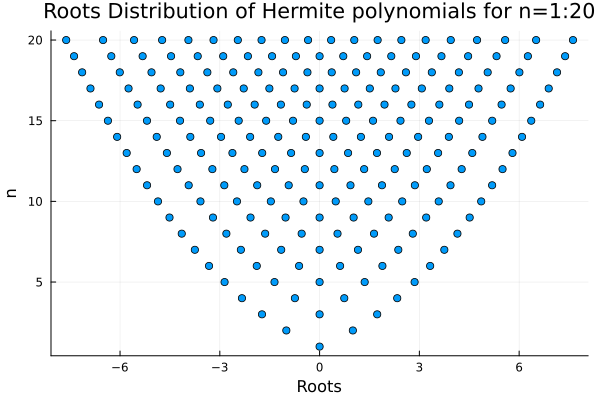

In [6]:
using Plots

# Collect roots for n=1:20
root_data = []
for n in 1:20
    push!(root_data, roots(He_symbolic(n)))
end

# Flatten the root data and associate each root with its corresponding n
x_vals = vcat(root_data...)
y_vals = vcat([fill(n, length(root_data[n])) for n in 1:20]...)

# Plot the roots distribution
scatter(x_vals, y_vals, xlabel="Roots", ylabel="n", title="Roots Distribution of Hermite polynomials for n=1:20", legend=false)

To efficiently compute the roots of the Hermite polynomials, we can use the generating matrix $\mathrm{T}_n$ and compute the eigenvalues of the matrix. This is a numerically stable method as the matrix is tridiagonal, symmetric, and there exists numerically stable algorithms to compute the eigenvalues and eigenvectors of such matrices.

In [7]:
function T(n::Int)
    d = zeros(n)
    e = sqrt.(1:n-1)
    T = SymTridiagonal(d, e)
    return T
end
   
using LinearAlgebra

function get_eigen(n::Int)
    Tn = T(n)
    F = eigen(Tn)                      # Eigenvalues and eigenvectors
    idx = sortperm(F.values)           # Sort eigenvalues and eigenvectors
    eigenvals = F.values[idx]          # Sorted eigenvalues (roots)
    eigenvecs = F.vectors[:, idx]      # Sorted eigenvectors

    # One step of Newton's method to refine the roots
    He_nx = He.(n, eigenvals)          # Hermite polynomial at the roots
    He_nm1x = He.(n-1, eigenvals)      # Candidate for the derivative
    eigenvals .-= He_nx ./ (n .* He_nm1x)
    return eigenvals, eigenvecs
end

get_eigen (generic function with 1 method)

In [8]:
eigenvals, _ = get_eigen(5)
println("Eigenvalues for n=5: ", eigenvals)
println(sort(roots(He_symbolic(5))))

Eigenvalues for n=5: [-2.8569700138728056, -1.355626179974266, 0.0, 1.355626179974266, 2.8569700138728056]
[-2.856970013872804, -1.3556261799742675, 0.0, 1.3556261799742657, 2.856970013872808]


From the above comparison, we can see that the eigenvalues computed from the generating matrix preserve the symmetry of the roots better. As $n$ increases, this algorithm becomes more efficient than the root-finding algorithm, as the roots become more clustered together.

## Normalized eigenvectors of the Hermite generating matrix

Now we are in a position to compute the eigenvectors of the Hermite generating matrix $\mathrm{T}_n$.
Note that we already computed the eigenvalues and eigenvectors of the Hermite generating matrix $\mathrm{T}_n$ in the previous section using a numerically robust method.
In this section, we will construct the normalized eigenvectors of the Hermite generating matrix by evaluating the normalized Hermite polynomials at the roots of the Hermite polynomial, i.e. $\mathbf{v}_{n,k}$ for $k=1, \dots, n$.

In [9]:
using SpecialFunctions: logfactorial

# An auxiliary function to compute the normalization constant
function He_l2norm(n::Int)
    return sqrt(exp(logfactorial(n)))
end

function analytic_eigenvecs(n::Int)
    Pmat = zeros(Float64, n, n) # initializing the matrix

    rts, _ = get_eigen(n)  # Get the roots

    for i in 1:n
        root_i = rts[i]

        for j in 1:n
            Pmat[j, i] = He(j-1, root_i) / He_l2norm(j-1)
        end

        # Normalize each vector (column)
        Pmat[:, i] /= norm(Pmat[:, i])
    end

    return Pmat
end

analytic_eigenvecs (generic function with 1 method)

### Numerical properties of the eigenvectors

Now, we have two ways to compute the eigenvectors of the Hermite generating matrix $\mathrm{T}_n$: one is theoretically precise, the other is numerical. We will compare the two methods and see how well they agree with each other.

There are two important properties of the eigenvectors of the Hermite generating matrix $\mathrm{T}_n$ that we need to note:
1. The column matrix $\mathrm{P}_n$ of eigenvectors is orthonormal, i.e. $\mathrm{P}_n^T \mathrm{P}_n = \mathrm{I}_n$.
2. By conjugating the eigenvectors, we can obtain the eigenvalues of the Hermite generating matrix $\mathrm{T}_n$, which is a diagonal matrix $\mathrm{D}_n$ with the roots of the Hermite polynomial on the diagonal. 
$$
\mathrm{P}_n^T \mathrm{T}_n \mathrm{P}_n = \mathrm{D}_n.
$$
We will check how well these properties hold for both methods of computing the eigenvectors. The following codes compute the $\infty$ norm of the above two properties.

In [10]:
function orthonormality_error(P::Matrix{Float64})
    return norm(P' * P - I, Inf)
end

function diagonal_error(P::Matrix{Float64}, eigenvals::Vector{Float64}, n::Int)
    return norm(P' * T(n) *  P - Diagonal(eigenvals), Inf)
end

diagonal_error (generic function with 1 method)

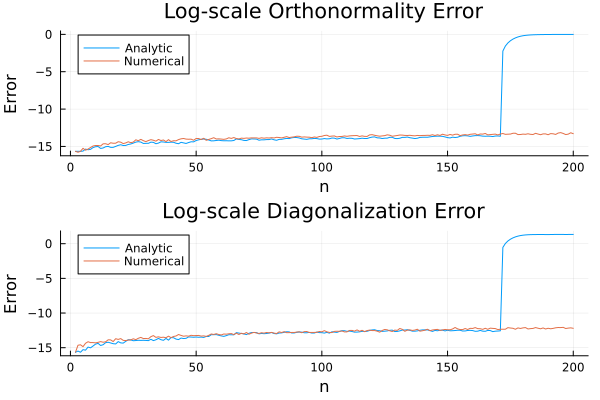

In [11]:
# Define the range of n
n_values = 2:200

# Initialize error arrays for both methods
analytic_orth_errors = Float64[]
analytic_diag_errors = Float64[]
numerical_orth_errors = Float64[]
numerical_diag_errors = Float64[]

# Compute errors for both methods
for n in n_values
    P_analytic = analytic_eigenvecs(n)
    rts, P_numerical = get_eigen(n)

    push!(analytic_orth_errors, orthonormality_error(P_analytic))
    push!(analytic_diag_errors, diagonal_error(P_analytic, rts, n))
    push!(numerical_orth_errors, orthonormality_error(P_numerical))
    push!(numerical_diag_errors, diagonal_error(P_numerical, rts, n))
end

# Create 2x2 subplots
p1 = plot(n_values, log10.(analytic_orth_errors), label="Analytic", title="Log-scale Orthonormality Error", xlabel="n", ylabel="Error")
plot!(p1, n_values, log10.(numerical_orth_errors), label="Numerical")

p2 = plot(n_values, log10.(analytic_diag_errors), label="Analytic", title="Log-scale Diagonalization Error", xlabel="n", ylabel="Error")
plot!(p2, n_values, log10.(numerical_diag_errors), label="Numerical")

plot(p1, p2, layout=(2, 1))

From the plot we can see that the analytical method is marginally better than the numerical method before $n\approx 170$, but both errors for analytical method blow up after $n\approx 170$, while the numerical method remains stable. The reason for this is that in the analytical method, we need to compute the normalization factor of the Hermite polynomial, which is given by $||\mathrm{He}_n||_{\mathrm{L}^2} = \sqrt{n!}$, and the factorial grows very quickly, eventually blows up at $n\approx 170$.

In [12]:
for n in 169:172
    print(He_l2norm(n), ", ")
end

2.0661723086434517e152, 2.6939590968143674e153, Inf, Inf, 

To solve this problem, we can use the recurrence relation to compute the normalized Hermite polynomials as before, which avoids the need to compute the normalization factor. 

In [13]:
function Henorm(n::Int, x::Float64)
    He_0 = 1.0
    if n == 0
        return He_0
    end

    He_1 = x

    for k in 2:n
        He_2 = x * He_1 / sqrt(k) - sqrt((k - 1) / k) * He_0
        He_0, He_1 = He_1, He_2
    end

    return He_1
end

function analytic_eigenvecs_norm(n::Int)
    Pmat = zeros(Float64, n, n) # initializing the matrix

    rts, _ = get_eigen(n)  # Get the roots

    for i in 1:n
        root_i = rts[i]

        for j in 1:n
            Pmat[j, i] = Henorm(j-1, root_i)
        end

        # Normalize each vector (column)
        Pmat[:, i] /= norm(Pmat[:, i])
    end

    return Pmat
end

analytic_eigenvecs_norm (generic function with 1 method)

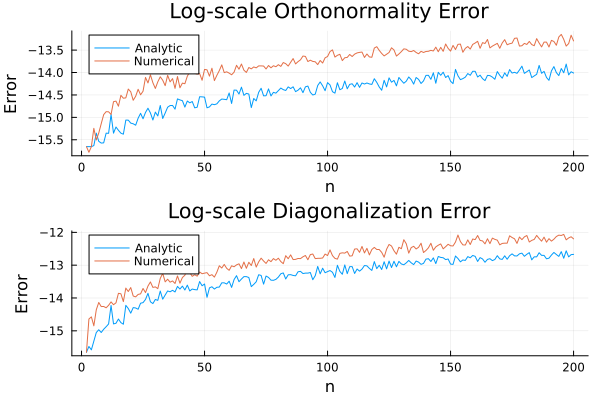

In [14]:
# Define the range of n
n_values = 2:200

# Initialize error arrays for both methods
analytic_orth_errors = Float64[]
analytic_diag_errors = Float64[]
numerical_orth_errors = Float64[]
numerical_diag_errors = Float64[]

# Compute errors for both methods
for n in n_values
    P_analytic = analytic_eigenvecs_norm(n)
    rts, P_numerical = get_eigen(n)

    push!(analytic_orth_errors, orthonormality_error(P_analytic))
    push!(analytic_diag_errors, diagonal_error(P_analytic, rts, n))
    push!(numerical_orth_errors, orthonormality_error(P_numerical))
    push!(numerical_diag_errors, diagonal_error(P_numerical, rts, n))
end

# Create 2x2 subplots
p1 = plot(n_values, log10.(analytic_orth_errors), label="Analytic", title="Log-scale Orthonormality Error", xlabel="n", ylabel="Error")
plot!(p1, n_values, log10.(numerical_orth_errors), label="Numerical")

p2 = plot(n_values, log10.(analytic_diag_errors), label="Analytic", title="Log-scale Diagonalization Error", xlabel="n", ylabel="Error")
plot!(p2, n_values, log10.(numerical_diag_errors), label="Numerical")

plot(p1, p2, layout=(2, 1))

After the above changes, we can see that the analytical method is now more stable than the numerical method, and the errors are much smaller. 
However, in practice, using large $n$ for the Hermite polynomials is not recommended, as there are already numerical instabilities when evaluating the Hermite polynomials.